## Project | Deep Learning: Image Classification with CNN

# Data Preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

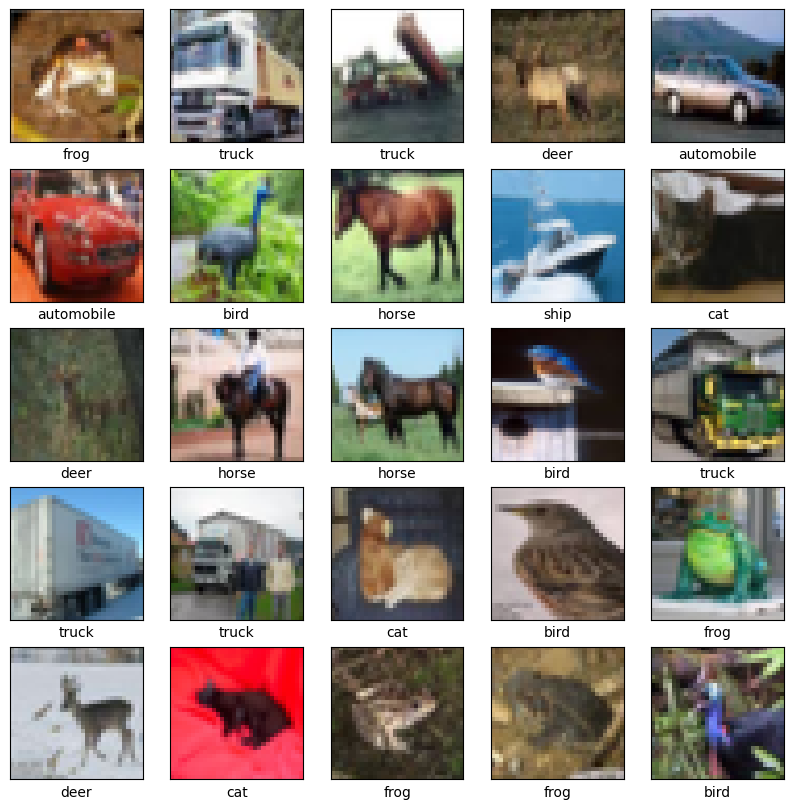

In [5]:
#visualizations
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
#Convert the labels to one-hot encoded form.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [7]:
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)

train_labels shape: (50000, 10)
test_labels shape: (10000, 10)


In [8]:
train_images.shape

(50000, 32, 32, 3)

# Model 1

## Model Architecture

In [ ]:
model= keras.Sequential([

    layers.Input(shape=(32,32,3)),
    #Layer 1: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 2: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.3),

    #Layer 3: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 4: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.4),

    #Layer 5: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 6: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.4),

    # Flatten Layer
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(512, activation='relu'),
    # Softmax Layer
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define Callbacks for Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
batch_size = 100
epochs = 50
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2592 - loss: 1.9683 - val_accuracy: 0.4813 - val_loss: 1.4226
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4914 - loss: 1.3962 - val_accuracy: 0.5590 - val_loss: 1.2033
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5696 - loss: 1.2000 - val_accuracy: 0.6406 - val_loss: 1.0155
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6213 - loss: 1.0617 - val_accuracy: 0.6499 - val_loss: 0.9869
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6537 - loss: 0.9692 - val_accuracy: 0.6939 - val_loss: 0.8636
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6790 - loss: 0.9021 - val_accuracy: 0.7205 - val_loss: 0.7959
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7082 - loss: 0.8318 - val_accuracy: 0.7246 - val_loss: 0.7799
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7241 - loss: 0.7834 - val_accuracy: 0

In [ ]:
model.save("cnn_model1.h5")

In [ ]:
# Get final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Get final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.8818
Final Validation Accuracy: 0.8147
Final Training Loss: 0.3306
Final Validation Loss: 0.5708


## Model Evaluation

* Evaluate the trained model on a separate validation set.
* Compute and report metrics such as accuracy, precision, recall, and F1-score.
* Visualize the confusion matrix to understand model performance across different classes.


In [ ]:
#load model
model = keras.models.load_model("cnn_model1.h5")

In [ ]:
#Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8228 - loss: 0.5404
Test Accuracy: 0.8164


In [ ]:
# Predict class probabilities
y_pred_prob = model.predict(test_images)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
#Compute and report metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8164
Precision: 0.8170
Recall: 0.8164
F1-score: 0.8155


In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.89      0.93      0.91      1000
           2       0.81      0.70      0.75      1000
           3       0.68      0.61      0.65      1000
           4       0.81      0.78      0.79      1000
           5       0.68      0.79      0.73      1000
           6       0.82      0.88      0.85      1000
           7       0.84      0.87      0.85      1000
           8       0.90      0.88      0.89      1000
           9       0.92      0.87      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



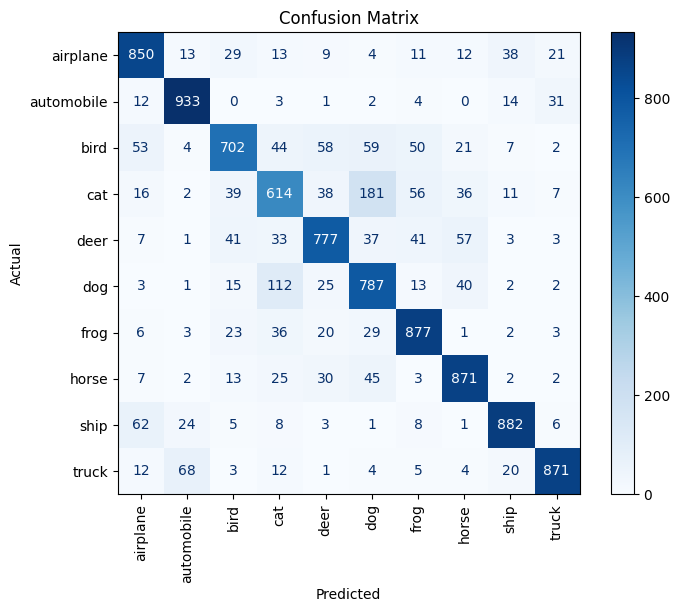

In [ ]:
#Visualize the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

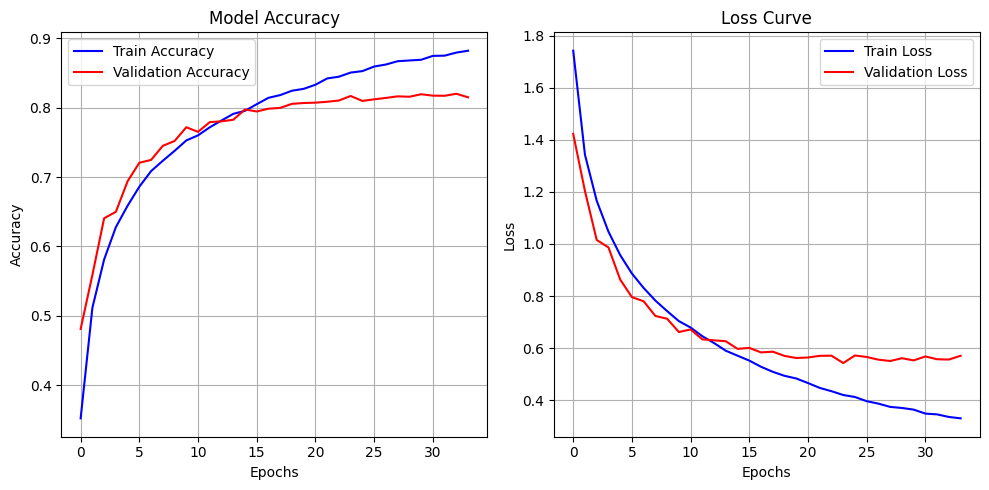

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

axs[0].plot(history.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show()


# Model 2:


## Model Architecture

In [ ]:
second_model= keras.Sequential([

    layers.Input(shape=(32,32,3)),
    #Layer 1: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),


    layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same',kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Flatten Layer
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(1024, activation='relu',kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    # Softmax Layer
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
second_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,248,746 (8.58 MB)

 Trainable params: 2,248,298 (8.58 MB)

 Non-trainable params: 448 (1.75 KB)

## Model Training

In [ ]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

second_model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define Callbacks for Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 50
history2 = second_model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3375 - loss: 3.5969 - val_accuracy: 0.4473 - val_loss: 2.4098
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5549 - loss: 2.0461 - val_accuracy: 0.6197 - val_loss: 1.7792
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6413 - loss: 1.6978 - val_accuracy: 0.6875 - val_loss: 1.5872
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6803 - loss: 1.5924 - val_accuracy: 0.7155 - val_loss: 1.4875
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7041 - loss: 1.5193 - val_accuracy: 0.6052 - val_loss: 1.9874
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7222 - loss: 1.4745 - val_accuracy: 0.7252 - val_loss: 1.4486
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7312 - loss: 1.4221 - val_accuracy: 0.6962 - val_loss: 1.5575
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7410 - loss: 1.3942 - val_accuracy: 

In [ ]:
second_model.save("second_model.h5")

In [ ]:
final_train_acc = history2.history['accuracy'][-1]
final_val_acc = history2.history['val_accuracy'][-1]

# Get final training and validation loss
final_train_loss = history2.history['loss'][-1]
final_val_loss = history2.history['val_loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.8022
Final Validation Accuracy: 0.7909
Final Training Loss: 1.0924
Final Validation Loss: 1.1279


## Evaluate

In [ ]:
#Evaluate
test_loss, test_acc = second_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8080 - loss: 1.0728
Test Accuracy: 0.8117


In [ ]:
# Predict class probabilities
y_pred_prob2 = second_model.predict(test_images)

# Convert probabilities to class labels
y_pred2 = np.argmax(y_pred_prob2, axis=1)
y_true2 = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


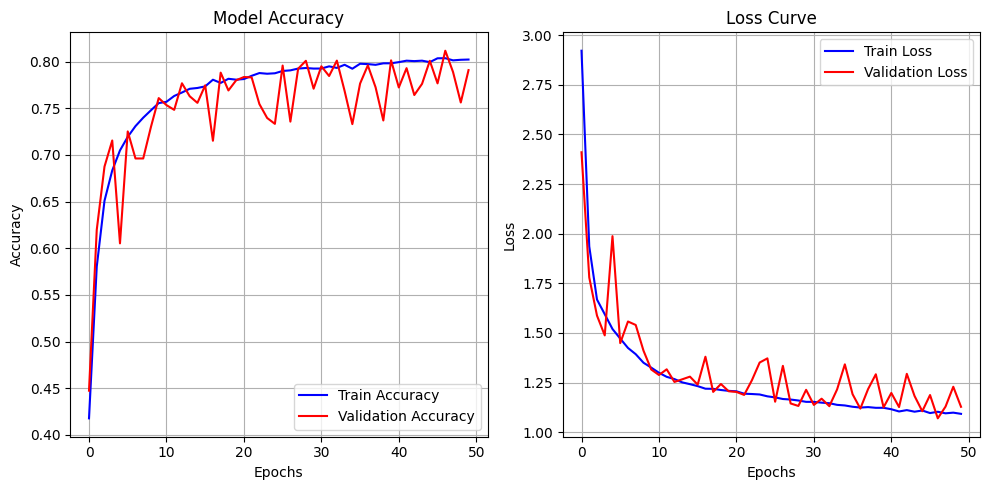

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot Accuracy  & validation accuracy
axs[0].plot(history2.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history2.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history2.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history2.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show()


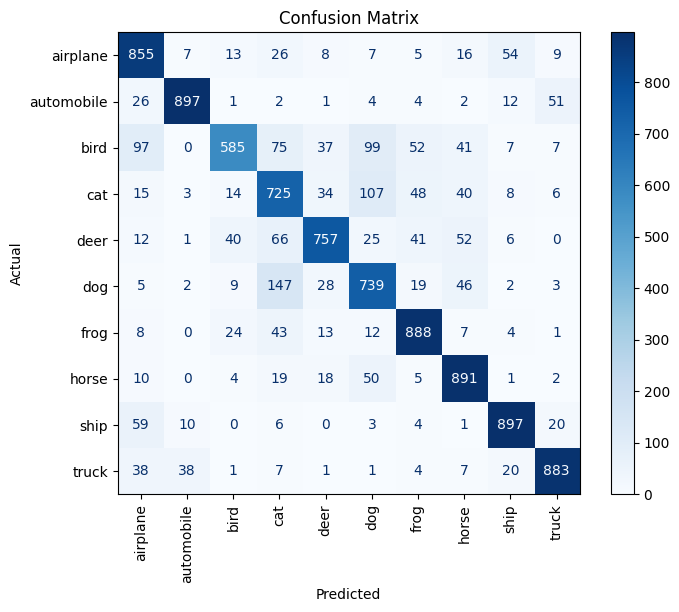

In [ ]:
#Visualize the confusion matrix
cm = confusion_matrix(y_true2, y_pred2)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true2, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.94      0.90      0.92      1000
           2       0.85      0.58      0.69      1000
           3       0.65      0.72      0.69      1000
           4       0.84      0.76      0.80      1000
           5       0.71      0.74      0.72      1000
           6       0.83      0.89      0.86      1000
           7       0.81      0.89      0.85      1000
           8       0.89      0.90      0.89      1000
           9       0.90      0.88      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



In [ ]:
#Compute and report metrics
accuracy2 = accuracy_score(y_true2, y_pred2)
precision2 = precision_score(y_true2, y_pred2, average='weighted')
recall2 = recall_score(y_true2, y_pred2, average='weighted')
f1_second = f1_score(y_true2, y_pred2, average='weighted')

print(f'Accuracy: {accuracy2:.4f}')
print(f'Precision: {precision2:.4f}')
print(f'Recall: {recall2:.4f}')
print(f'F1-score: {f1_second:.4f}')

Accuracy: 0.8117
Precision: 0.8166
Recall: 0.8117
F1-score: 0.8107


In [ ]:
y_pred2[:10]

array([3, 8, 8, 8, 6, 6, 1, 6, 3, 1])

In [ ]:
y_true2[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

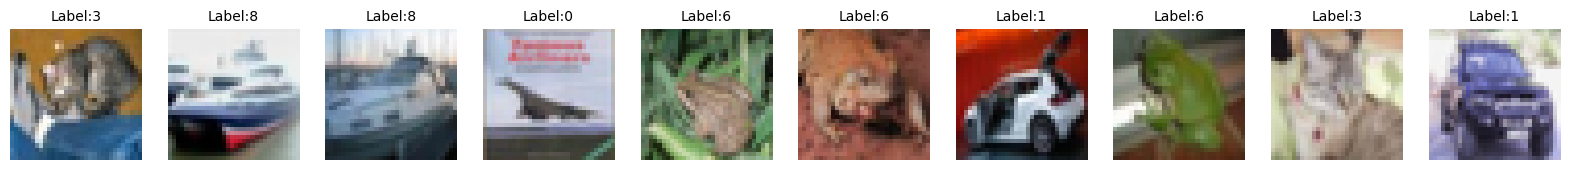

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i in range(10):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"Label:{y_true2[i]}", fontsize=10)
    axes[i].axis('off')

plt.show()

# Model 3

## Model Architecture

In [89]:
# Initialize a Sequential model
model_3 = Sequential([
    # input Layer
    layers.Input(shape=(32,32,3)),

    # First Convolutional Block
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Second Convolutional Block
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

     # Third Convolutional Block
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Fourth Convolutional Block
    layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Averages feature maps instead of flattening, reducing parameters and overfitting
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layer
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),

    # output Layer
    layers.Dense(10, activation='softmax')

])

# Prints the model architecture summary
model_3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1024)                │         525,3

 Total params: 2,127,306 (8.12 MB)

 Trainable params: 2,125,386 (8.11 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Model Training

In [90]:
#Compiles the model
model_3.compile(loss='categorical_crossentropy',
             optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])


In [91]:
# Stops training if val_loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs=45 # Maximum training epochs

batch_size=64 # Number of samples per batch

history_3 = model_3.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])# Apply early stopping

Epoch 1/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.2640 - loss: 2.1967 - val_accuracy: 0.3178 - val_loss: 2.4832
Epoch 2/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4406 - loss: 1.5901 - val_accuracy: 0.4914 - val_loss: 1.5082
Epoch 3/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5109 - loss: 1.4110 - val_accuracy: 0.3816 - val_loss: 2.4788
Epoch 4/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5673 - loss: 1.2701 - val_accuracy: 0.4935 - val_loss: 1.7999
Epoch 5/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6015 - loss: 1.1763 - val_accuracy: 0.5639 - val_loss: 1.4997
Epoch 6/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6316 - loss: 1.0883 - val_accuracy: 0.6416 - val_loss: 1.1257
Epoch 7/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6598 - loss: 1.0180 - val_accuracy: 0.6540 - val_loss: 1.0915
Epoch 8/45
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6801 - loss: 0.9772 - val_accuracy: 

In [92]:
# Get the last recorded training accuracy & validation accuracy
final_train_acc3 = history_3.history['accuracy'][-1]
final_val_acc3 = history_3.history['val_accuracy'][-1]

# Get the last recorded training loss & validation loss
final_train_loss3 = history_3.history['loss'][-1]
final_val_loss3 = history_3.history['val_loss'][-1]

# Print final accuracy and loss values
print(f"Final Training Accuracy: {final_train_acc3:.4f}")
print(f"Final Validation Accuracy: {final_val_acc3:.4f}")
print(f"Final Training Loss: {final_train_loss3:.4f}")
print(f"Final Validation Loss: {final_val_loss3:.4f}")

Final Training Accuracy: 0.8938
Final Validation Accuracy: 0.8605
Final Training Loss: 0.3860
Final Validation Loss: 0.5502


In [96]:
# Saves the trained model
model_3.save("CNN_model3.h5")

## Model Evaluation

In [93]:
# Evaluates the model on test data
test_loss3, test_acc3 = model_3.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc3:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.5521
Test Accuracy: 0.8605


In [97]:
# Predict class probabilities
y_pred_prob3 = model_3.predict(test_images)

# Convert probabilities to class labels
y_pred3 = np.argmax(y_pred_prob3, axis=1)

# Converts one-hot encoded test labels to class labels
y_true3 = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


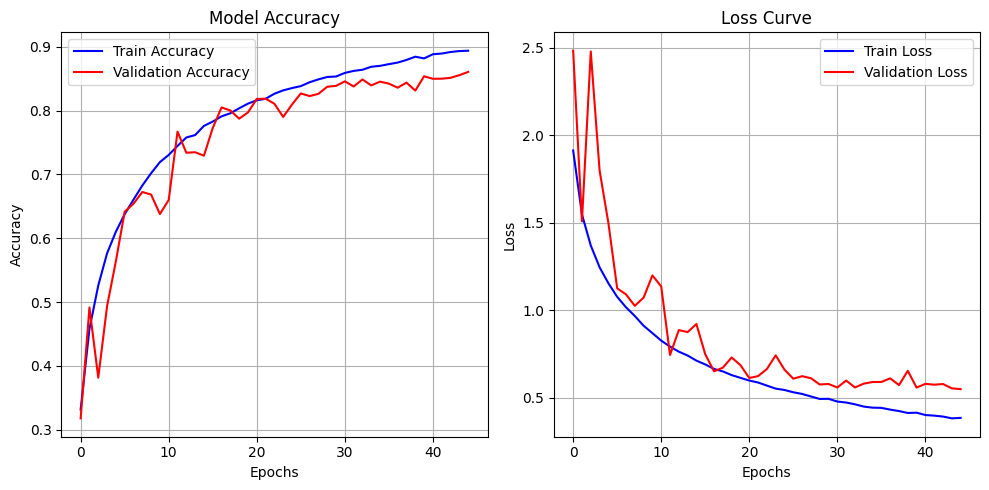

In [98]:
# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Accuracy  & validation accuracy
axs[0].plot(history_3.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history_3.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history_3.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history_3.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show() # Display the plots


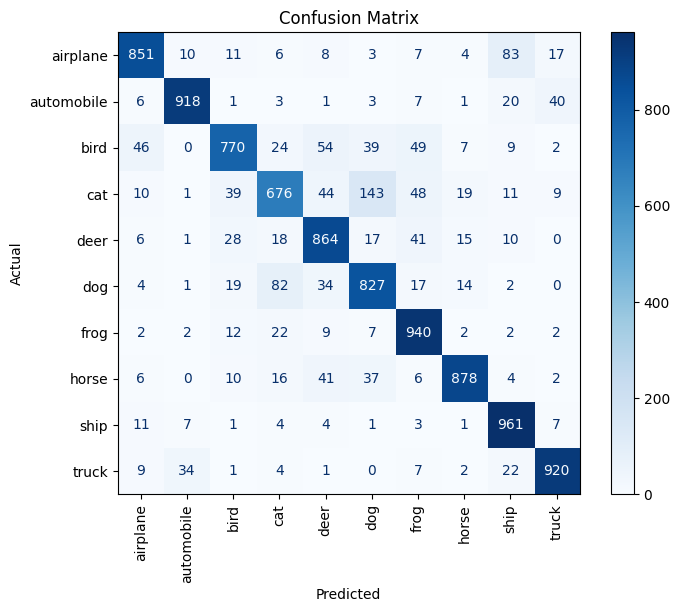

In [99]:
# Compute the confusion matrix
cm = confusion_matrix(y_true3, y_pred3)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [100]:
 # Compute accuracy, precision, recall, and F1-score for the model's performance
accuracy3 = accuracy_score(y_true3, y_pred3)
precision3 = precision_score(y_true3, y_pred3, average='weighted')
recall3 = recall_score(y_true3, y_pred3, average='weighted')
f1_3= f1_score(y_true3, y_pred3, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy3:.4f}')
print(f'Precision: {precision3:.4f}')
print(f'Recall: {recall3:.4f}')
print(f'F1-score: {f1_3:.4f}')

Accuracy: 0.8605
Precision: 0.8617
Recall: 0.8605
F1-score: 0.8594


In [101]:
# print a detailed classification report
print(classification_report(y_true3, y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.94      0.92      0.93      1000
           2       0.86      0.77      0.81      1000
           3       0.79      0.68      0.73      1000
           4       0.82      0.86      0.84      1000
           5       0.77      0.83      0.80      1000
           6       0.84      0.94      0.88      1000
           7       0.93      0.88      0.90      1000
           8       0.85      0.96      0.90      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Transfer Learning
